In [1]:
import numpy as np
import pandas as pd
import os
import calendar
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# Get shapefile from csv

In [2]:
os.chdir('C:\\Users\\omkarp\\Downloads\\Hannes\\Trips\\')
data0 = pd.read_csv("gothenburg_trips 1.csv", index_col=0)
data0['usetime'] = data0['usetime'].str.replace('0 days ', '')
data0['usetime'] = pd.to_timedelta(data0['usetime'])
data0['usetime_seconds'] = data0['usetime'].dt.total_seconds()
data0['duration'] = data0['usetime_seconds'].round(0)
data0.head()

,id,o_time,d_time,o_lat,o_lng,d_lat,d_lng,o_battery,d_battery,distance,usetime,type,usetime_seconds,duration
0,005a7301-b129-4617-9387-c283b4f99ffb,2022-01-01 10:07:14,2022-01-01 10:12:20,57.716818,12.005409,57.722735,12.014706,67.0,61.0,858.896259,0 days 00:05:06,tier,306.0,306.0
1,00bf8cce-c219-4b77-b16b-0350fbb8dae5,2022-01-01 02:56:42,2022-01-01 02:59:47,57.688625,11.927119,57.699583,11.953693,100.0,100.0,1994.642556,0 days 00:03:05,tier,185.0,185.0
2,00bf8cce-c219-4b77-b16b-0350fbb8dae5,2022-01-01 03:14:53,2022-01-01 03:20:54,57.699590,11.953440,57.695994,11.952005,100.0,100.0,408.848195,0 days 00:06:01,tier,361.0,361.0
3,00eaaf38-22f6-494a-8171-adf42c45365d,2022-01-01 01:24:48,2022-01-01 01:30:50,57.727956,12.008755,57.730357,12.012607,43.0,43.0,351.536255,0 days 00:06:02,tier,362.0,362.0
4,018bb523-523d-4bd0-979b-a095f22a17a1,2022-01-01 05:46:15,2022-01-01 06:10:45,57.702975,11.967562,57.706074,11.957904,91.0,91.0,669.305216,0 days 00:24:30,tier,1470.0,1470.0


In [3]:
gdf = gpd.GeoDataFrame(
    data0, 
    geometry=[Point(xy) for xy in zip(data0.o_lng, data0.o_lat)]
)
gdf.crs = "EPSG:4326"
gdf.head()

,id,o_time,d_time,o_lat,o_lng,d_lat,d_lng,o_battery,d_battery,distance,usetime,type,usetime_seconds,duration,geometry
0,005a7301-b129-4617-9387-c283b4f99ffb,2022-01-01 10:07:14,2022-01-01 10:12:20,57.716818,12.005409,57.722735,12.014706,67.0,61.0,858.896259,0 days 00:05:06,tier,306.0,306.0,POINT (12.00541 57.71682)
1,00bf8cce-c219-4b77-b16b-0350fbb8dae5,2022-01-01 02:56:42,2022-01-01 02:59:47,57.688625,11.927119,57.699583,11.953693,100.0,100.0,1994.642556,0 days 00:03:05,tier,185.0,185.0,POINT (11.92712 57.68863)
2,00bf8cce-c219-4b77-b16b-0350fbb8dae5,2022-01-01 03:14:53,2022-01-01 03:20:54,57.699590,11.953440,57.695994,11.952005,100.0,100.0,408.848195,0 days 00:06:01,tier,361.0,361.0,POINT (11.95344 57.69959)
3,00eaaf38-22f6-494a-8171-adf42c45365d,2022-01-01 01:24:48,2022-01-01 01:30:50,57.727956,12.008755,57.730357,12.012607,43.0,43.0,351.536255,0 days 00:06:02,tier,362.0,362.0,POINT (12.00876 57.72796)
4,018bb523-523d-4bd0-979b-a095f22a17a1,2022-01-01 05:46:15,2022-01-01 06:10:45,57.702975,11.967562,57.706074,11.957904,91.0,91.0,669.305216,0 days 00:24:30,tier,1470.0,1470.0,POINT (11.96756 57.70298)


In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 659155 entries, 0 to 2808
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   id               659155 non-null  object         
 1   o_time           659155 non-null  object         
 2   d_time           659155 non-null  object         
 3   o_lat            659155 non-null  float64        
 4   o_lng            659155 non-null  float64        
 5   d_lat            659155 non-null  float64        
 6   d_lng            659155 non-null  float64        
 7   o_battery        16943 non-null   float64        
 8   d_battery        16943 non-null   float64        
 9   distance         659155 non-null  float64        
 10  usetime          659155 non-null  timedelta64[ns]
 11  type             659155 non-null  object         
 12  usetime_seconds  659155 non-null  float64        
 13  duration         659155 non-null  float64        
 14  geo

In [5]:
data1 = gpd.read_file("JUR_BASOMRÅDEN_XU_region.shp")
data1.head()

,SW_MEMBER,AJOUR_DATU,BASOMRÅDE,KVALITET,OPERATÖR,REG_DATUM,AREA_KM2,Area_m2,geometry
0,20126.0,20230124153717.000,20808,0.0,SBKANAL,20230124153717.000,0.05,46551.1,"POLYGON Z ((150174.496 6398833.597 0.000, 1500..."
1,20127.0,20230124153717.000,40511,0.0,SBKANAL,20230124153717.000,0.12,119006.0,"POLYGON Z ((145833.528 6404442.255 0.000, 1458..."
2,20128.0,20230124153717.000,21008,0.0,SBKANAL,20230124153717.000,0.02,17343.0,"POLYGON Z ((151888.385 6399651.059 0.000, 1519..."
3,20129.0,20230124153717.000,51051,0.0,SBKANAL,20230124153717.000,0.11,107686.0,"POLYGON Z ((145921.388 6393975.297 0.000, 1459..."
4,20130.0,20230124153717.000,40903,0.0,SBKANAL,20230124153717.000,0.78,775411.0,"POLYGON Z ((147478.748 6403882.950 0.000, 1474..."


In [6]:
data1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SW_MEMBER   1014 non-null   float64 
 1   AJOUR_DATU  1014 non-null   object  
 2   BASOMRÅDE   1014 non-null   object  
 3   KVALITET    1014 non-null   float64 
 4   OPERATÖR    1014 non-null   object  
 5   REG_DATUM   1014 non-null   object  
 6   AREA_KM2    1014 non-null   float64 
 7   Area_m2     1014 non-null   float64 
 8   geometry    1014 non-null   geometry
dtypes: float64(4), geometry(1), object(4)
memory usage: 71.4+ KB


In [7]:
print("Original CRS of gdf:", gdf.crs)
print("CRS of data1:", data1.crs)
if gdf.crs != data1.crs:
    gdf = gdf.to_crs(data1.crs)

print("Updated CRS of gdf:", gdf.crs)

Original CRS of gdf: EPSG:4326
CRS of data1: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",12],PARAMETER["scale_factor",1],PARAMETER["false_easting",150000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3007"]]
Updated CRS of gdf: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",12],PARAMETER["scale_factor",1],PARAMETER["false_easting",150000],PARAMETER["false_northing",0],UNIT["metre",1,AUT

In [8]:
data1.crs

<Projected CRS: PROJCS["SWEREF99 12 00",GEOGCS["SWEREF99",DATUM["S ...>
Name: SWEREF99 12 00
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
data1.columns

Index(['SW_MEMBER', 'AJOUR_DATU', 'BASOMRÅDE', 'KVALITET', 'OPERATÖR',
       'REG_DATUM', 'AREA_KM2', 'Area_m2', 'geometry'],
      dtype='object')

In [10]:
joined_gdf = gpd.sjoin(gdf, data1, how="left", op="within")
joined_gdf = joined_gdf[['id', 'BASOMRÅDE', 'Area_m2', 'o_time', 'd_time', 'o_lat', 'o_lng', 'duration', 'distance','geometry']]
joined_gdf.head()

,id,BASOMRÅDE,Area_m2,o_time,d_time,o_lat,o_lng,duration,distance,geometry
0,005a7301-b129-4617-9387-c283b4f99ffb,20203,74947.5,2022-01-01 10:07:14,2022-01-01 10:12:20,57.716818,12.005409,306.0,858.896259,POINT (150322.371 6399743.247)
1,00bf8cce-c219-4b77-b16b-0350fbb8dae5,10316,85211.3,2022-01-01 02:56:42,2022-01-01 02:59:47,57.688625,11.927119,185.0,1994.642556,POINT (145652.992 6396605.649)
2,00bf8cce-c219-4b77-b16b-0350fbb8dae5,10707,49081.5,2022-01-01 03:14:53,2022-01-01 03:20:54,57.699590,11.953440,361.0,408.848195,POINT (147223.754 6397825.463)
3,00eaaf38-22f6-494a-8171-adf42c45365d,30158,149901.0,2022-01-01 01:24:48,2022-01-01 01:30:50,57.727956,12.008755,362.0,351.536255,POINT (150521.629 6400983.738)
4,018bb523-523d-4bd0-979b-a095f22a17a1,11603,141341.0,2022-01-01 05:46:15,2022-01-01 06:10:45,57.702975,11.967562,1470.0,669.305216,POINT (148065.991 6398201.967)


In [11]:
joined_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 659155 entries, 0 to 2808
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   id         659155 non-null  object  
 1   BASOMRÅDE  655633 non-null  object  
 2   Area_m2    655633 non-null  float64 
 3   o_time     659155 non-null  object  
 4   d_time     659155 non-null  object  
 5   o_lat      659155 non-null  float64 
 6   o_lng      659155 non-null  float64 
 7   duration   659155 non-null  float64 
 8   distance   659155 non-null  float64 
 9   geometry   659155 non-null  geometry
dtypes: float64(5), geometry(1), object(4)
memory usage: 55.3+ MB


In [12]:
# output_file_path = "C:/Users/omkarp/Downloads/Hannes/Trips/GOT_ptTrips.shp"
# joined_gdf.to_file(output_file_path)

In [13]:
joined_gdf['o_time'] = pd.to_datetime(joined_gdf['o_time'], errors='coerce')
joined_gdf['d_time'] = pd.to_datetime(joined_gdf['d_time'], errors='coerce')
joined_gdf = joined_gdf.sort_values(by=["o_time"]).reset_index(drop=True)
joined_gdf['date'] = joined_gdf['o_time'].dt.day
joined_gdf['hour'] = joined_gdf['o_time'].dt.hour
joined_gdf['month'] = joined_gdf['o_time'].dt.strftime('%b')
joined_gdf['weekday'] = joined_gdf['o_time'].dt.strftime('%a')
joined_gdf['year'] = joined_gdf['o_time'].dt.year
joined_gdf.head()

,id,BASOMRÅDE,Area_m2,o_time,d_time,o_lat,o_lng,duration,distance,geometry,date,hour,month,weekday,year
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,1323880.0,2022-01-01 00:00:12,2022-01-01 00:09:14,57.689731,11.952699,542.0,1109.776442,POINT (147178.804 6396727.474),1,0,Jan,Sat,2022
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,1323880.0,2022-01-01 00:00:12,2022-01-01 00:09:14,57.689620,11.952950,542.0,1138.217558,POINT (147193.766 6396715.102),1,0,Jan,Sat,2022
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,42486.4,2022-01-01 00:00:25,2022-01-01 00:03:25,57.697433,11.970257,180.0,260.270407,POINT (148226.389 6397584.721),1,0,Jan,Sat,2022
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,305647.0,2022-01-01 00:00:25,2022-01-01 00:09:26,57.689621,11.980165,541.0,806.442142,POINT (148816.940 6396714.409),1,0,Jan,Sat,2022
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,75983.6,2022-01-01 00:00:25,2022-01-01 00:03:25,57.698673,11.969276,180.0,351.595630,POINT (148167.991 6397722.824),1,0,Jan,Sat,2022


In [14]:
joined_gdf.columns

Index(['id', 'BASOMRÅDE', 'Area_m2', 'o_time', 'd_time', 'o_lat', 'o_lng',
       'duration', 'distance', 'geometry', 'date', 'hour', 'month', 'weekday',
       'year'],
      dtype='object')

In [15]:
df2022 = joined_gdf[joined_gdf['year'] == 2022]
df2022 = df2022[['id','BASOMRÅDE','o_time','Area_m2','duration','distance','date','hour','month','weekday','geometry']]
df2022 = df2022.sort_values(by=["o_time"]).reset_index(drop=True)
df2022 = df2022.dropna(axis = 0)
df2022.head()

,id,BASOMRÅDE,o_time,Area_m2,duration,distance,date,hour,month,weekday,geometry
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,2022-01-01 00:00:12,1323880.0,542.0,1109.776442,1,0,Jan,Sat,POINT (147178.804 6396727.474)
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,2022-01-01 00:00:12,1323880.0,542.0,1138.217558,1,0,Jan,Sat,POINT (147193.766 6396715.102)
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,2022-01-01 00:00:25,42486.4,180.0,260.270407,1,0,Jan,Sat,POINT (148226.389 6397584.721)
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,2022-01-01 00:00:25,305647.0,541.0,806.442142,1,0,Jan,Sat,POINT (148816.940 6396714.409)
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,2022-01-01 00:00:25,75983.6,180.0,351.595630,1,0,Jan,Sat,POINT (148167.991 6397722.824)


In [16]:
df2022.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 655633 entries, 0 to 659154
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         655633 non-null  object        
 1   BASOMRÅDE  655633 non-null  object        
 2   o_time     655633 non-null  datetime64[ns]
 3   Area_m2    655633 non-null  float64       
 4   duration   655633 non-null  float64       
 5   distance   655633 non-null  float64       
 6   date       655633 non-null  int32         
 7   hour       655633 non-null  int32         
 8   month      655633 non-null  object        
 9   weekday    655633 non-null  object        
 10  geometry   655633 non-null  geometry      
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(4)
memory usage: 55.0+ MB


In [17]:
# Missing dates in each month
dates22= pd.DataFrame(df2022.groupby('month')['date'].apply(lambda x: list(np.unique(x))))
dates22['total'] = dates22['date'].str.len()
dates22

,date,total
month,,
Apr,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",22
Aug,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",28
Dec,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
Jan,"[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",25
Jul,"[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, ...",28
Jun,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...",26
Mar,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]",11
May,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12
Nov,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...",21


In [18]:
print('The max length of a trip in 2022: ', df2022['distance'].max()/1000, 'km')
df2022['speed']= df2022['distance']/df2022['duration']
df2022.describe().round(2)

The max length of a trip in 2022:  96.24272086746063 km


,o_time,Area_m2,duration,distance,date,hour,speed
count,655633,655633.00,655633.0,655633.00,655633.00,655633.00,655633.00
mean,2022-07-03 23:12:09.324000,125447.05,565.0,1183.31,16.29,14.15,2.37
min,2022-01-01 00:00:12,2858.80,61.0,100.00,1.00,0.00,0.03
25%,2022-05-05 18:18:51,45326.10,273.0,561.85,10.00,11.00,1.71
50%,2022-07-11 20:48:18,80318.20,425.0,963.82,16.00,15.00,2.45
75%,2022-08-19 07:44:27,121059.00,696.0,1574.16,23.00,18.00,3.07
max,2022-12-20 06:34:13,8112520.00,3599.0,96242.72,31.00,23.00,525.92
std,NaN,236130.13,471.3,860.12,8.47,5.15,1.25


In [19]:
print('MinSpeed trip count', (df2022['speed'] < 1).sum())
print('MaxSpeed trip count', (df2022['speed'] > 8).sum())  # 10 mps = 36 kmph
print('MinDistance trip count', (df2022['distance'] < 150).sum())  # trips available are over 100 m of travel distance
print('MaxDistance trip count', (df2022['distance'] > 5000).sum())

MinSpeed trip count 69376
MaxSpeed trip count 550
MinDistance trip count 12091
MaxDistance trip count 1372


# Outliers?

In [20]:
#Outliers- Got another df excluding outliers
data = df2022[df2022['speed'] < 8] 
# data = data[df2022['speed'] > 0.5] -  round trips / monthly pass- scooter lying around unattended
data.describe().round(2)

,o_time,Area_m2,duration,distance,date,hour,speed
count,655083,655083.00,655083.00,655083.00,655083.00,655083.00,655083.00
mean,2022-07-03 23:16:25.944090368,125443.58,565.35,1182.45,16.29,14.16,2.36
min,2022-01-01 00:00:12,2858.80,61.00,100.00,1.00,0.00,0.03
25%,2022-05-05 18:05:58,45326.10,273.00,561.59,10.00,11.00,1.71
50%,2022-07-11 21:00:31,80318.20,425.00,963.28,16.00,15.00,2.45
75%,2022-08-19 07:54:42,121059.00,696.00,1573.14,23.00,18.00,3.07
max,2022-12-20 06:34:13,8112520.00,3599.00,11027.25,31.00,23.00,7.99
std,NaN,236125.69,471.34,851.38,8.47,5.14,0.96


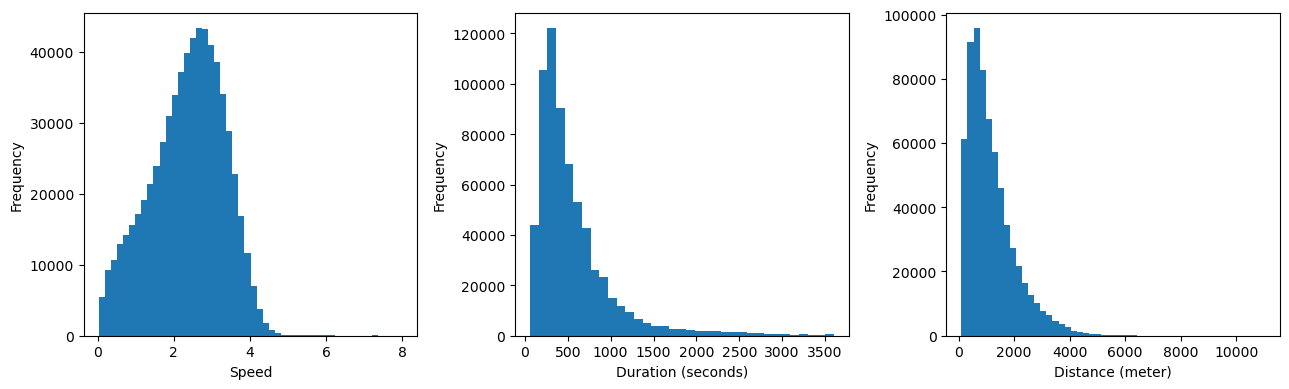

In [21]:
# Year round trips for the whole of Gothenburg

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].hist(data['speed'], bins=50)
axes[0].set_xlabel('Speed')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['duration'], bins=35) 
axes[1].set_xlabel('Duration (seconds)')
axes[2].set_ylabel('Frequency')

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
axes[2].hist(data['distance'], bins=50)
axes[2].set_xlabel('Distance (meter)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
data['Dated'] = data['o_time'].dt.strftime('%Y-%m-%d')
trip_counts_per_date = data.groupby('Dated').size().reset_index(name='Trip Count')
trip_counts_per_date = trip_counts_per_date.sort_values('Trip Count', ascending=False)
trip_counts_per_date

,Dated,Trip Count
113,2022-07-21,7750
96,2022-07-01,7426
150,2022-08-27,7275
95,2022-06-30,7261
142,2022-08-19,7037
...,...,...
209,2022-12-20,119
25,2022-03-21,67
196,2022-12-07,31
35,2022-03-31,17


In [23]:
trip_counts_per_date['Trip Count'].mean()

3119.442857142857

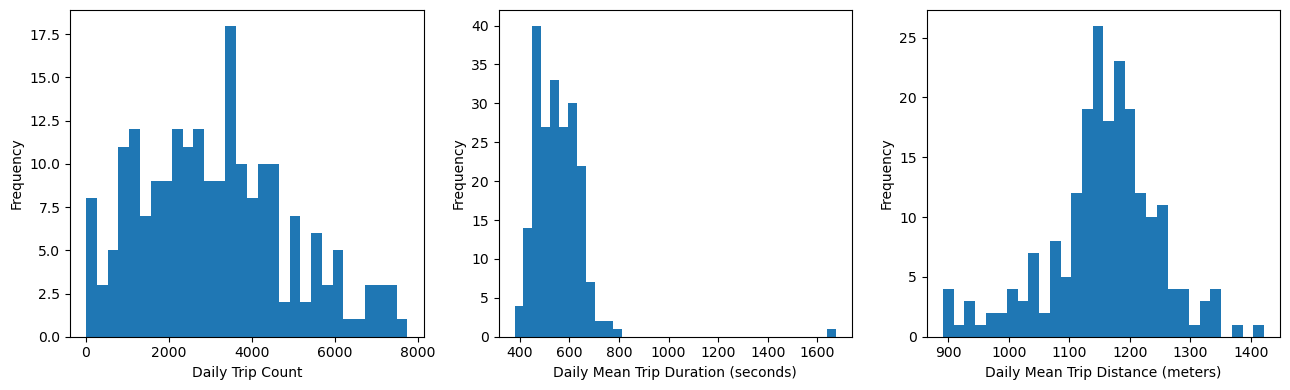

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Daily trip count
daily_trip_count = data.groupby('Dated').size()
axes[0].hist(daily_trip_count, bins=30)
axes[0].set_xlabel('Daily Trip Count')
axes[0].set_ylabel('Frequency')

# Daily mean trip duration
daily_mean_trip_duration = data.groupby('Dated')['duration'].mean()
axes[1].hist(daily_mean_trip_duration, bins=36)
axes[1].set_xlabel('Daily Mean Trip Duration (seconds)')
axes[1].set_ylabel('Frequency')

# Daily trip distance
daily_trip_distance = data.groupby('Dated')['distance'].mean()
axes[2].hist(daily_trip_distance, bins=30)
axes[2].set_xlabel('Daily Mean Trip Distance (meters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# EDA graphs

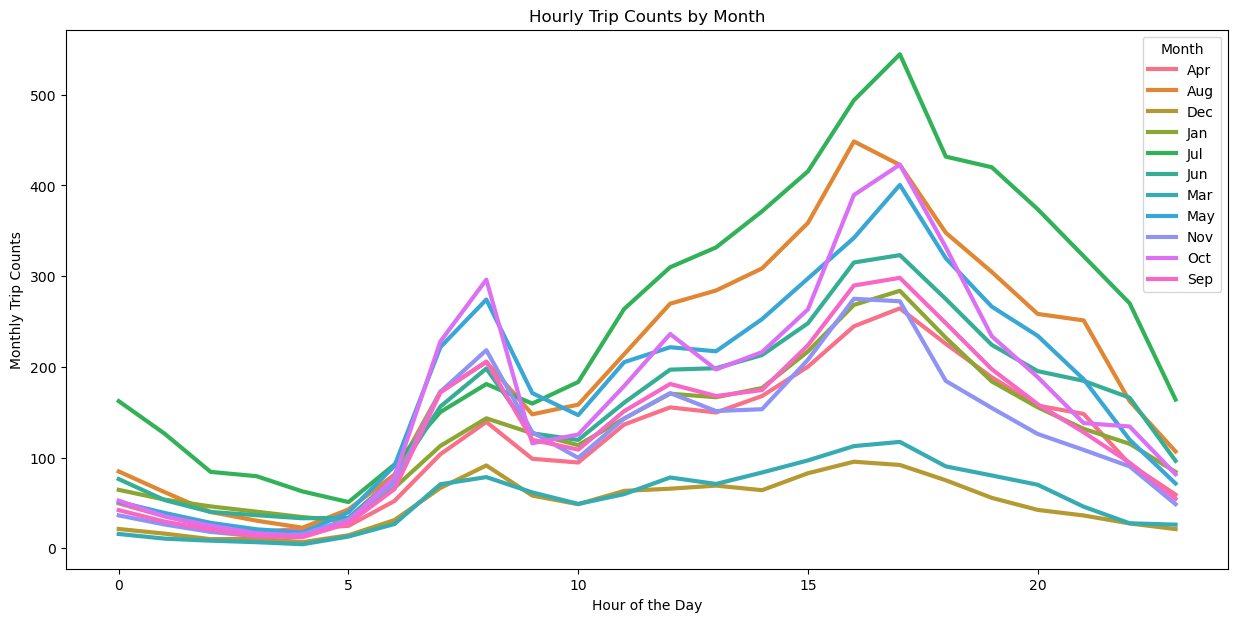

In [25]:
# Hourly number of trips variation per month
data['count_trip']=1
hourly_trip_counts = data.groupby(['hour', 'month','date'])['count_trip'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='count_trip', hue='month', data=hourly_trip_counts, estimator='mean', linewidth=3, ci=None)
plt.xlabel('Hour of the Day')
plt.ylabel('Monthly Trip Counts')
plt.title('Hourly Trip Counts by Month')
plt.legend(title='Month')
plt.show()

In [26]:
data.head()

,id,BASOMRÅDE,o_time,Area_m2,duration,distance,date,hour,month,weekday,geometry,speed,Dated,count_trip
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,2022-01-01 00:00:12,1323880.0,542.0,1109.776442,1,0,Jan,Sat,POINT (147178.804 6396727.474),2.047558,2022-01-01,1
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,2022-01-01 00:00:12,1323880.0,542.0,1138.217558,1,0,Jan,Sat,POINT (147193.766 6396715.102),2.100032,2022-01-01,1
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,2022-01-01 00:00:25,42486.4,180.0,260.270407,1,0,Jan,Sat,POINT (148226.389 6397584.721),1.445947,2022-01-01,1
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,2022-01-01 00:00:25,305647.0,541.0,806.442142,1,0,Jan,Sat,POINT (148816.940 6396714.409),1.490651,2022-01-01,1
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,2022-01-01 00:00:25,75983.6,180.0,351.595630,1,0,Jan,Sat,POINT (148167.991 6397722.824),1.953309,2022-01-01,1


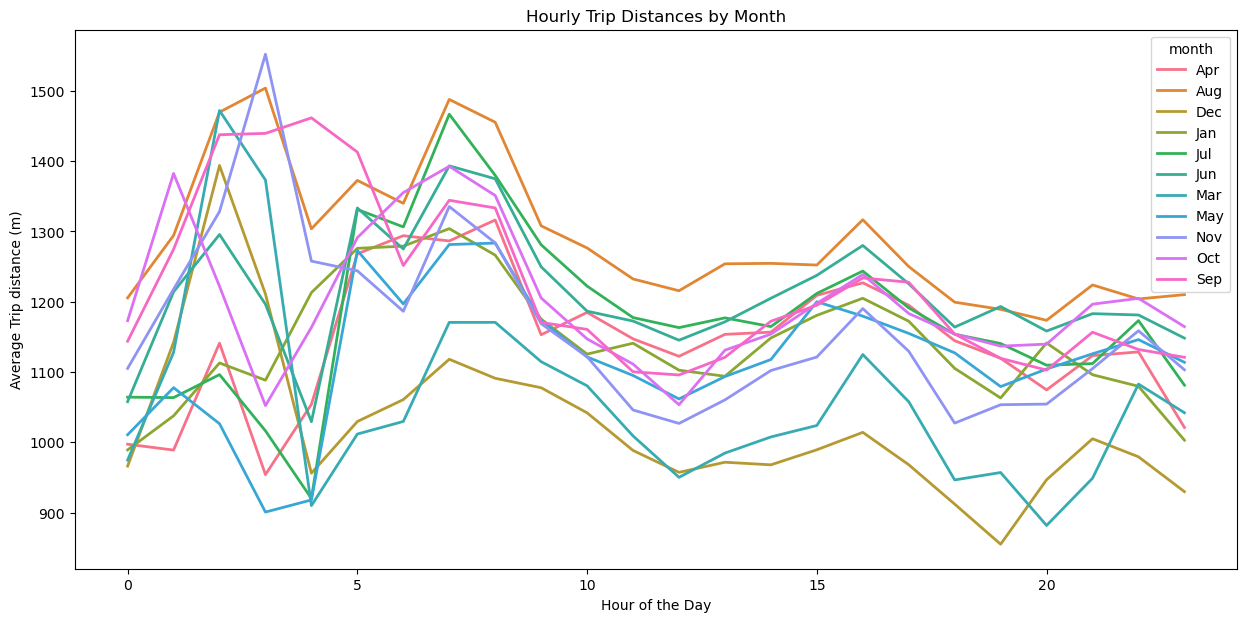

In [27]:
# Average trip distances are high at night hours almost all year round
hourly_trip_dist = data.groupby(['hour', 'month'])['distance'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='distance', hue='month', data=hourly_trip_dist, estimator='mean', ci=None, linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip distance (m)')
plt.title('Hourly Trip Distances by Month')
plt.show()

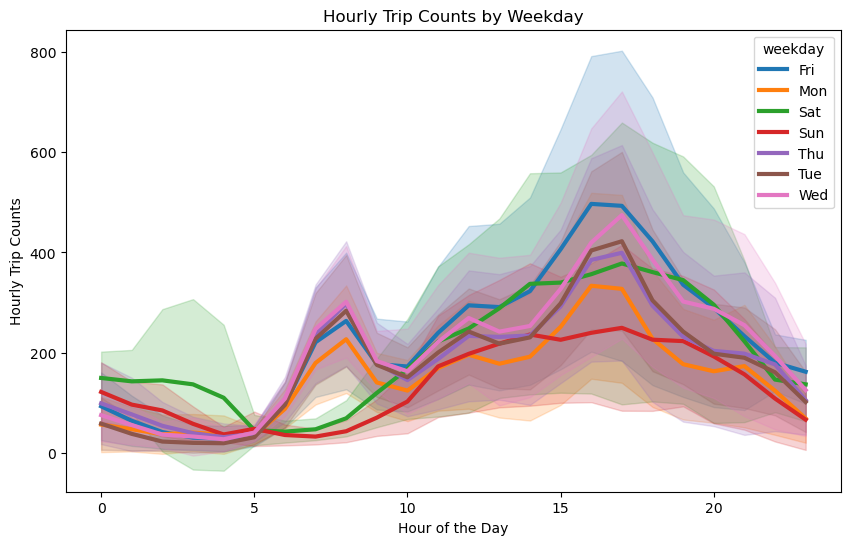

In [28]:
# Temporal distribution of trips for weekdays
hourly_trip_counts = data.groupby(['hour', 'weekday', 'date'])['count_trip'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count_trip', hue='weekday', data=hourly_trip_counts, estimator='mean', ci='sd', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Trip Counts')
plt.title('Hourly Trip Counts by Weekday')
plt.show()

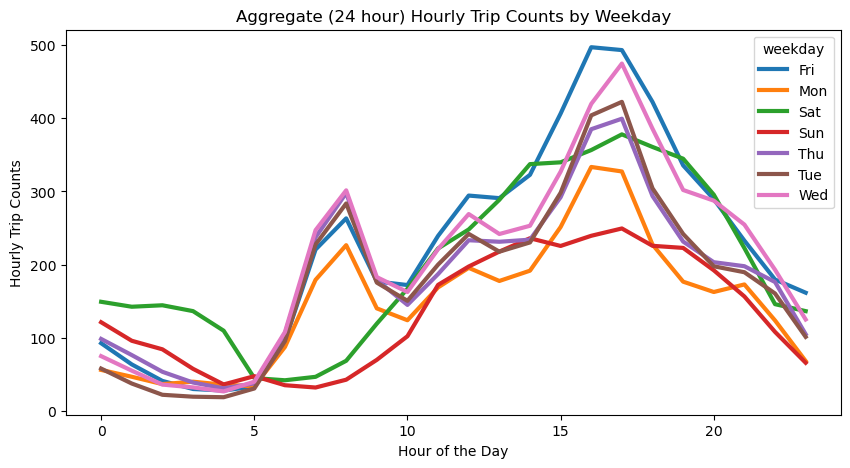

In [29]:
# Temporal distribution of trips for weekdays
hourly_trip_counts = data.groupby(['hour', 'weekday','date'])['count_trip'].sum().reset_index()
hourly_trip_counts = hourly_trip_counts.groupby(['hour', 'weekday'])['count_trip'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='count_trip', hue='weekday', data=hourly_trip_counts, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Trip Counts')
plt.title('Aggregate (24 hour) Hourly Trip Counts by Weekday')
plt.show()

In [30]:
data.head()

,id,BASOMRÅDE,o_time,Area_m2,duration,distance,date,hour,month,weekday,geometry,speed,Dated,count_trip
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,2022-01-01 00:00:12,1323880.0,542.0,1109.776442,1,0,Jan,Sat,POINT (147178.804 6396727.474),2.047558,2022-01-01,1
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,2022-01-01 00:00:12,1323880.0,542.0,1138.217558,1,0,Jan,Sat,POINT (147193.766 6396715.102),2.100032,2022-01-01,1
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,2022-01-01 00:00:25,42486.4,180.0,260.270407,1,0,Jan,Sat,POINT (148226.389 6397584.721),1.445947,2022-01-01,1
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,2022-01-01 00:00:25,305647.0,541.0,806.442142,1,0,Jan,Sat,POINT (148816.940 6396714.409),1.490651,2022-01-01,1
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,2022-01-01 00:00:25,75983.6,180.0,351.595630,1,0,Jan,Sat,POINT (148167.991 6397722.824),1.953309,2022-01-01,1


In [31]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 655083 entries, 0 to 659154
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          655083 non-null  object        
 1   BASOMRÅDE   655083 non-null  object        
 2   o_time      655083 non-null  datetime64[ns]
 3   Area_m2     655083 non-null  float64       
 4   duration    655083 non-null  float64       
 5   distance    655083 non-null  float64       
 6   date        655083 non-null  int32         
 7   hour        655083 non-null  int32         
 8   month       655083 non-null  object        
 9   weekday     655083 non-null  object        
 10  geometry    655083 non-null  geometry      
 11  speed       655083 non-null  float64       
 12  Dated       655083 non-null  object        
 13  count_trip  655083 non-null  int64         
dtypes: datetime64[ns](1), float64(4), geometry(1), int32(2), int64(1), object(5)
memory usage: 70.0+ 

In [32]:
data.columns   

Index(['id', 'BASOMRÅDE', 'o_time', 'Area_m2', 'duration', 'distance', 'date',
       'hour', 'month', 'weekday', 'geometry', 'speed', 'Dated', 'count_trip'],
      dtype='object')

In [33]:
gotdf = data.groupby(['BASOMRÅDE','Area_m2','date','month','weekday'])['count_trip'].sum().reset_index()
gotdf.head()

,BASOMRÅDE,Area_m2,date,month,weekday,count_trip
0,10101,72488.5,1,Aug,Mon,4
1,10101,72488.5,1,Dec,Thu,1
2,10101,72488.5,1,Jan,Sat,8
3,10101,72488.5,1,Jul,Fri,9
4,10101,72488.5,1,May,Sun,6


In [34]:
gotdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70211 entries, 0 to 70210
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BASOMRÅDE   70211 non-null  object 
 1   Area_m2     70211 non-null  float64
 2   date        70211 non-null  int32  
 3   month       70211 non-null  object 
 4   weekday     70211 non-null  object 
 5   count_trip  70211 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.9+ MB


In [35]:
gotdf['BASOMRÅDE'].nunique()

506

# Include Temporal variables

In [36]:
os.chdir('C:\\Users\\omkarp\\Downloads\\Hannes\\Trips\\')
data3 = pd.read_csv("temporaldemand.csv")
data3.head()

,Date,count,weekday,month,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
0,2022-01-01,2431,5,1,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8
1,2022-01-02,1514,6,1,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9
2,2022-01-03,1586,0,1,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7
3,2022-01-06,287,3,1,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0
4,2022-01-07,1563,4,1,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0


In [37]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            272 non-null    object 
 1   count           272 non-null    int64  
 2   weekday         272 non-null    int64  
 3   month           272 non-null    int64  
 4   avg temp        272 non-null    float64
 5   max temp        272 non-null    float64
 6   min temp        272 non-null    float64
 7   avg precip      272 non-null    float64
 8   max precip      272 non-null    float64
 9   min precip      272 non-null    float64
 10  avg Wind speed  272 non-null    float64
 11  max Wind speed  272 non-null    float64
 12  min Wind speed  272 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 27.8+ KB


In [38]:
data3['date'] = pd.to_datetime(data3['Date'], errors='coerce')
data3 = data3.sort_values(by=["date"]).reset_index(drop=True)
data3['date'] = data3['date'].dt.day
data3.head()

,Date,count,weekday,month,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed,date
0,2022-01-01,2431,5,1,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8,1
1,2022-01-02,1514,6,1,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9,2
2,2022-01-03,1586,0,1,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7,3
3,2022-01-06,287,3,1,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0,6
4,2022-01-07,1563,4,1,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0,7


In [39]:
# data3.drop(['Date', 'count'], axis = 1, inplace = True)
month_mapping = {i: calendar.month_abbr[i] for i in range(1, 13)}
data3['month'] = data3['month'].map(month_mapping)
weekday_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data3['weekday'] = data3['weekday'].map(weekday_mapping)
data3.head()

,Date,count,weekday,month,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed,date
0,2022-01-01,2431,Sat,Jan,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8,1
1,2022-01-02,1514,Sun,Jan,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9,2
2,2022-01-03,1586,Mon,Jan,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7,3
3,2022-01-06,287,Thu,Jan,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0,6
4,2022-01-07,1563,Fri,Jan,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0,7


In [40]:
data.head()

,id,BASOMRÅDE,o_time,Area_m2,duration,distance,date,hour,month,weekday,geometry,speed,Dated,count_trip
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,2022-01-01 00:00:12,1323880.0,542.0,1109.776442,1,0,Jan,Sat,POINT (147178.804 6396727.474),2.047558,2022-01-01,1
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,2022-01-01 00:00:12,1323880.0,542.0,1138.217558,1,0,Jan,Sat,POINT (147193.766 6396715.102),2.100032,2022-01-01,1
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,2022-01-01 00:00:25,42486.4,180.0,260.270407,1,0,Jan,Sat,POINT (148226.389 6397584.721),1.445947,2022-01-01,1
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,2022-01-01 00:00:25,305647.0,541.0,806.442142,1,0,Jan,Sat,POINT (148816.940 6396714.409),1.490651,2022-01-01,1
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,2022-01-01 00:00:25,75983.6,180.0,351.595630,1,0,Jan,Sat,POINT (148167.991 6397722.824),1.953309,2022-01-01,1


In [41]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            272 non-null    object 
 1   count           272 non-null    int64  
 2   weekday         272 non-null    object 
 3   month           272 non-null    object 
 4   avg temp        272 non-null    float64
 5   max temp        272 non-null    float64
 6   min temp        272 non-null    float64
 7   avg precip      272 non-null    float64
 8   max precip      272 non-null    float64
 9   min precip      272 non-null    float64
 10  avg Wind speed  272 non-null    float64
 11  max Wind speed  272 non-null    float64
 12  min Wind speed  272 non-null    float64
 13  date            272 non-null    int32  
dtypes: float64(9), int32(1), int64(1), object(3)
memory usage: 28.8+ KB


In [42]:
data['Dated'] = data['o_time'].dt.date
grouped_data = data.groupby('Dated')['count_trip'].sum().reset_index()
result = pd.merge(grouped_data, data[['date', 'month', 'weekday', 'Dated']], on='Dated', how='left')
result = result.drop_duplicates()
result = result.reset_index(drop=True)
result.head()

,Dated,count_trip,date,month,weekday
0,2022-01-01,3991,1,Jan,Sat
1,2022-01-02,2501,2,Jan,Sun
2,2022-01-03,2626,3,Jan,Mon
3,2022-01-06,434,6,Jan,Thu
4,2022-01-07,2456,7,Jan,Fri


In [43]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Dated       210 non-null    object
 1   count_trip  210 non-null    int64 
 2   date        210 non-null    int32 
 3   month       210 non-null    object
 4   weekday     210 non-null    object
dtypes: int32(1), int64(1), object(3)
memory usage: 7.5+ KB


In [44]:
# We have less dates in current data- e-scooter trips for gothenburg! Get new data from Ruo..
result['Dated'] = pd.to_datetime(result['Dated'])
data3['Date'] = pd.to_datetime(data3['Date'])
merged_data = pd.merge(result, data3, left_on='Dated', right_on='Date', how='outer')
merged_data.head()

,Dated,count_trip,date_x,month_x,weekday_x,Date,count,weekday_y,month_y,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed,date_y
0,2022-01-01,3991.0,1.0,Jan,Sat,2022-01-01,2431.0,Sat,Jan,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8,1.0
1,2022-01-02,2501.0,2.0,Jan,Sun,2022-01-02,1514.0,Sun,Jan,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9,2.0
2,2022-01-03,2626.0,3.0,Jan,Mon,2022-01-03,1586.0,Mon,Jan,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7,3.0
3,2022-01-06,434.0,6.0,Jan,Thu,2022-01-06,287.0,Thu,Jan,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0,6.0
4,2022-01-07,2456.0,7.0,Jan,Fri,2022-01-07,1563.0,Fri,Jan,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0,7.0


In [45]:
merged_data['Date'] = merged_data['Date'].fillna(merged_data['Dated'])
merged_data['count_trip'] = merged_data['count_trip'].fillna(merged_data['count'])
columns_to_drop = ['Dated', 'count', 'weekday_y', 'month_y', 'date_y', 'date_x', 'month_x', 'weekday_x']
merged_data = merged_data.drop(columns=columns_to_drop)
merged_data.head()

,count_trip,Date,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
0,3991.0,2022-01-01,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8
1,2501.0,2022-01-02,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9
2,2626.0,2022-01-03,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7
3,434.0,2022-01-06,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0
4,2456.0,2022-01-07,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0


In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   count_trip      298 non-null    float64       
 1   Date            298 non-null    datetime64[ns]
 2   avg temp        272 non-null    float64       
 3   max temp        272 non-null    float64       
 4   min temp        272 non-null    float64       
 5   avg precip      272 non-null    float64       
 6   max precip      272 non-null    float64       
 7   min precip      272 non-null    float64       
 8   avg Wind speed  272 non-null    float64       
 9   max Wind speed  272 non-null    float64       
 10  min Wind speed  272 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 25.7 KB


In [47]:
GOTtemporal= merged_data.dropna()
GOTtemporal.head()

,count_trip,Date,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
0,3991.0,2022-01-01,4.483333,7.2,1.8,0.379167,3.4,0.0,3.275000,6.0,1.8
1,2501.0,2022-01-02,7.137500,8.0,6.2,0.116667,1.1,0.0,3.075000,6.0,1.9
2,2626.0,2022-01-03,6.437500,7.0,4.4,0.070833,0.7,0.0,4.416667,6.3,2.7
3,434.0,2022-01-06,-2.929167,0.9,-5.5,0.000000,0.0,0.0,1.512500,4.2,0.0
4,2456.0,2022-01-07,1.820833,4.0,-3.2,0.408333,1.9,0.0,2.866667,3.6,1.0


In [48]:
GOTtemporal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 297
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   count_trip      272 non-null    float64       
 1   Date            272 non-null    datetime64[ns]
 2   avg temp        272 non-null    float64       
 3   max temp        272 non-null    float64       
 4   min temp        272 non-null    float64       
 5   avg precip      272 non-null    float64       
 6   max precip      272 non-null    float64       
 7   min precip      272 non-null    float64       
 8   avg Wind speed  272 non-null    float64       
 9   max Wind speed  272 non-null    float64       
 10  min Wind speed  272 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 25.5 KB


In [49]:
# output_file_path = "C:/Users/omkarp/Downloads/Hannes/Trips/GOTtemporal.csv"
# GOTtemporal.to_csv(output_file_path)

# Bulit attributes- Spatial

In [50]:
gotdf.head()

,BASOMRÅDE,Area_m2,date,month,weekday,count_trip
0,10101,72488.5,1,Aug,Mon,4
1,10101,72488.5,1,Dec,Thu,1
2,10101,72488.5,1,Jan,Sat,8
3,10101,72488.5,1,Jul,Fri,9
4,10101,72488.5,1,May,Sun,6


In [51]:
data.head()

,id,BASOMRÅDE,o_time,Area_m2,duration,distance,date,hour,month,weekday,geometry,speed,Dated,count_trip
0,5b10ef24-5824-4b9a-adf0-daf78d352c8d,10652,2022-01-01 00:00:12,1323880.0,542.0,1109.776442,1,0,Jan,Sat,POINT (147178.804 6396727.474),2.047558,2022-01-01,1
1,14002f3f-b868-4df2-acc1-774967b1051c,10652,2022-01-01 00:00:12,1323880.0,542.0,1138.217558,1,0,Jan,Sat,POINT (147193.766 6396715.102),2.100032,2022-01-01,1
2,ca482733-0f61-4f92-815a-b3e9f7979c10,11504,2022-01-01 00:00:25,42486.4,180.0,260.270407,1,0,Jan,Sat,POINT (148226.389 6397584.721),1.445947,2022-01-01,1
3,f5109561-1cfc-490c-93ee-c798b6cb13ba,11152,2022-01-01 00:00:25,305647.0,541.0,806.442142,1,0,Jan,Sat,POINT (148816.940 6396714.409),1.490651,2022-01-01,1
4,115c1ec6-41ef-4f44-87c0-3651984fb8b6,11508,2022-01-01 00:00:25,75983.6,180.0,351.595630,1,0,Jan,Sat,POINT (148167.991 6397722.824),1.953309,2022-01-01,1


In [52]:
grouped_data = data.groupby(['Dated', 'BASOMRÅDE'])['count_trip'].sum().reset_index()
columns_to_keep = [col for col in data.columns if col not in ['id', 'o_time', 'duration', 'distance', 'date', 'hour', 'month', 'weekday','speed']]
grouped_data = grouped_data.merge(data[columns_to_keep], on=['Dated', 'BASOMRÅDE'], how='left')
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655083 entries, 0 to 655082
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Dated         655083 non-null  object  
 1   BASOMRÅDE     655083 non-null  object  
 2   count_trip_x  655083 non-null  int64   
 3   Area_m2       655083 non-null  float64 
 4   geometry      655083 non-null  geometry
 5   count_trip_y  655083 non-null  int64   
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 30.0+ MB


In [53]:
grouped_data.head()

,Dated,BASOMRÅDE,count_trip_x,Area_m2,geometry,count_trip_y
0,2022-01-01,10101,8,72488.5,POINT (144817.992 6396795.305),1
1,2022-01-01,10101,8,72488.5,POINT (144611.636 6396583.998),1
2,2022-01-01,10101,8,72488.5,POINT (144821.345 6396792.751),1
3,2022-01-01,10101,8,72488.5,POINT (144820.356 6396820.368),1
4,2022-01-01,10101,8,72488.5,POINT (144580.060 6396409.851),1


In [54]:
mean_count_trip = grouped_data.groupby('BASOMRÅDE')['count_trip_x'].mean().reset_index()
GOT_Spatial = pd.merge(grouped_data.drop(columns=['count_trip_x']), mean_count_trip, on='BASOMRÅDE', how='left')
GOT_Spatial = GOT_Spatial.drop_duplicates()
GOT_Spatial.drop(columns=['Dated','count_trip_y'], inplace=True)
GOT_Spatial = GOT_Spatial.rename(columns={'count_trip_x': 'count_trip'})
GOT_Spatial.head()

,BASOMRÅDE,Area_m2,geometry,count_trip
0,10101,72488.5,POINT (144817.992 6396795.305),7.901408
1,10101,72488.5,POINT (144611.636 6396583.998),7.901408
2,10101,72488.5,POINT (144821.345 6396792.751),7.901408
3,10101,72488.5,POINT (144820.356 6396820.368),7.901408
4,10101,72488.5,POINT (144580.060 6396409.851),7.901408


In [55]:
GOT_Spatial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654726 entries, 0 to 655082
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   BASOMRÅDE   654726 non-null  object  
 1   Area_m2     654726 non-null  float64 
 2   geometry    654726 non-null  geometry
 3   count_trip  654726 non-null  float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 25.0+ MB


In [56]:
os.chdir('C:\\Users\\omkarp\\Downloads\\Hannes\\Trips\\')
data25 = pd.read_csv("df_analysis.csv")          # , index_col=0
data25.head()

,BASOMRÅDE,daily demand,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Arte,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %
0,20808,6.503521,12762.000000,45.6,3.5,354000.0,0.051489,1162.298266,0.323095,0.000000,...,0.0,281.200566,113.621922,473.209003,0.0,0.05,675.0,0.213333,0.490370,0.425185
1,20810,1.348592,10470.000000,45.6,3.5,354000.0,0.051489,1106.924929,0.000000,0.396883,...,0.0,0.000000,0.000000,591.618341,0.0,0.03,316.0,0.253165,0.541139,0.300633
2,20806,0.369718,1057.857143,45.6,3.5,354000.0,0.051489,1425.294954,0.000000,0.000000,...,0.0,269.768147,532.536466,2079.857369,0.0,0.14,146.0,0.472603,0.493151,0.280822
3,20802,3.000000,22877.500000,45.6,3.5,354000.0,0.051489,1481.166590,0.371875,0.000000,...,0.0,289.507862,89.147892,839.476173,0.0,0.04,904.0,0.287611,0.491150,0.409292
4,20805,1.739437,4479.473684,45.6,3.5,354000.0,0.051489,1276.135017,0.000000,0.000000,...,0.0,728.661013,372.430749,1092.776162,0.0,0.19,869.0,0.339471,0.487917,0.360184


In [57]:
data25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BASOMRÅDE                             460 non-null    int64  
 1   daily demand                          460 non-null    float64
 2   pop.dens                              460 non-null    float64
 3   Higher education 3 yrs or longer (%)  460 non-null    float64
 4   openly unemployed and in programs     460 non-null    float64
 5   Average income                        460 non-null    float64
 6   Proportion of students                460 non-null    float64
 7   distance                              460 non-null    float64
 8   LUP_Commercial                        460 non-null    float64
 9   LUP_Educational                       460 non-null    float64
 10  LUP_Health                            460 non-null    float64
 11  LUP_Other          

In [58]:
GOT_Spatial['BASOMRÅDE'] = GOT_Spatial['BASOMRÅDE'].astype(int)
data25['BASOMRÅDE'] = data25['BASOMRÅDE'].astype(int)

merged_df = pd.merge(GOT_Spatial, data25, on='BASOMRÅDE', how='outer')
merged_df.head()

,BASOMRÅDE,Area_m2,geometry,count_trip,daily demand,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,...,Rd_Arte,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %
0,10101,72488.5,POINT (144817.992 6396795.305),7.901408,3.260563,4744.285714,46.1,6.2,313100.0,0.059934,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
1,10101,72488.5,POINT (144611.636 6396583.998),7.901408,3.260563,4744.285714,46.1,6.2,313100.0,0.059934,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
2,10101,72488.5,POINT (144821.345 6396792.751),7.901408,3.260563,4744.285714,46.1,6.2,313100.0,0.059934,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
3,10101,72488.5,POINT (144820.356 6396820.368),7.901408,3.260563,4744.285714,46.1,6.2,313100.0,0.059934,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
4,10101,72488.5,POINT (144580.060 6396409.851),7.901408,3.260563,4744.285714,46.1,6.2,313100.0,0.059934,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729


In [59]:
mean_count_trip = merged_df.groupby('BASOMRÅDE')['count_trip'].mean().reset_index()
merged_df = pd.merge(merged_df.drop(columns=['count_trip']), mean_count_trip, on='BASOMRÅDE', how='left')
merged_df.head()

,BASOMRÅDE,Area_m2,geometry,daily demand,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,...,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip
0,10101,72488.5,POINT (144817.992 6396795.305),3.260563,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729,7.901408
1,10101,72488.5,POINT (144611.636 6396583.998),3.260563,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729,7.901408
2,10101,72488.5,POINT (144821.345 6396792.751),3.260563,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729,7.901408
3,10101,72488.5,POINT (144820.356 6396820.368),3.260563,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729,7.901408
4,10101,72488.5,POINT (144580.060 6396409.851),3.260563,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729,7.901408


In [60]:
grouped = merged_df.groupby('BASOMRÅDE', as_index=False).agg({'count_trip': 'mean'})
merged_df = pd.merge(merged_df.drop(columns=['count_trip']), grouped, on='BASOMRÅDE', how='left')
merged_df = merged_df.drop_duplicates()
merged_df['count_trip'] = merged_df['count_trip'].fillna(merged_df['daily demand'])
merged_df = merged_df.drop(columns=['daily demand', 'geometry'])
merged_df = merged_df.drop_duplicates()
merged_df.head()

,BASOMRÅDE,Area_m2,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip
0,10101,72488.5,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,0.433173,0.00000,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.199430,0.527066,0.344729,7.901408
923,10102,31282.1,21470.000000,46.1,6.2,313100.0,0.059934,982.116529,0.248263,0.28734,...,212.327457,28.052074,1804.743632,0.000000,0.03,658.0,0.205167,0.477204,0.343465,2.987578
1245,10103,30098.6,16036.666667,46.1,6.2,313100.0,0.059934,1118.112529,0.311725,0.00000,...,488.501523,380.970685,1155.424310,0.000000,0.03,486.0,0.240741,0.452675,0.294239,4.353846
1700,10104,43917.9,12127.500000,46.1,6.2,313100.0,0.059934,982.790807,0.085758,0.00000,...,502.799921,347.724775,1429.946626,0.000000,0.04,481.0,0.207900,0.478170,0.328482,3.997732
2140,10105,37373.0,14377.500000,46.1,6.2,313100.0,0.059934,1073.130132,0.309373,0.00000,...,794.684111,72.491636,2051.778623,0.000000,0.04,596.0,0.209732,0.491611,0.337248,9.456140


In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 654725
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BASOMRÅDE                             506 non-null    int32  
 1   Area_m2                               506 non-null    float64
 2   pop.dens                              460 non-null    float64
 3   Higher education 3 yrs or longer (%)  460 non-null    float64
 4   openly unemployed and in programs     460 non-null    float64
 5   Average income                        460 non-null    float64
 6   Proportion of students                460 non-null    float64
 7   distance                              460 non-null    float64
 8   LUP_Commercial                        460 non-null    float64
 9   LUP_Educational                       460 non-null    float64
 10  LUP_Health                            460 non-null    float64
 11  LUP_Other            

In [62]:
GOTSpatial = merged_df.dropna()
GOTSpatial.reset_index(drop=True, inplace=True)
GOTSpatial.head()

,BASOMRÅDE,Area_m2,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip
0,10101,72488.5,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,0.433173,0.00000,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.199430,0.527066,0.344729,7.901408
1,10102,31282.1,21470.000000,46.1,6.2,313100.0,0.059934,982.116529,0.248263,0.28734,...,212.327457,28.052074,1804.743632,0.000000,0.03,658.0,0.205167,0.477204,0.343465,2.987578
2,10103,30098.6,16036.666667,46.1,6.2,313100.0,0.059934,1118.112529,0.311725,0.00000,...,488.501523,380.970685,1155.424310,0.000000,0.03,486.0,0.240741,0.452675,0.294239,4.353846
3,10104,43917.9,12127.500000,46.1,6.2,313100.0,0.059934,982.790807,0.085758,0.00000,...,502.799921,347.724775,1429.946626,0.000000,0.04,481.0,0.207900,0.478170,0.328482,3.997732
4,10105,37373.0,14377.500000,46.1,6.2,313100.0,0.059934,1073.130132,0.309373,0.00000,...,794.684111,72.491636,2051.778623,0.000000,0.04,596.0,0.209732,0.491611,0.337248,9.456140


In [63]:
GOTSpatial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BASOMRÅDE                             460 non-null    int32  
 1   Area_m2                               460 non-null    float64
 2   pop.dens                              460 non-null    float64
 3   Higher education 3 yrs or longer (%)  460 non-null    float64
 4   openly unemployed and in programs     460 non-null    float64
 5   Average income                        460 non-null    float64
 6   Proportion of students                460 non-null    float64
 7   distance                              460 non-null    float64
 8   LUP_Commercial                        460 non-null    float64
 9   LUP_Educational                       460 non-null    float64
 10  LUP_Health                            460 non-null    float64
 11  LUP_Other          

In [64]:
# output_file_path = "C:/Users/omkarp/Downloads/Hannes/Trips/GOTSpatial.csv"
# GOTSpatial.to_csv(output_file_path)

# For final shapefile- MGWR

In [65]:
merged_df = pd.merge(gotdf, data3, on=['date', 'month', 'weekday'], how='left')
merged_df = merged_df.sort_values('count_trip', ascending=False)
merged_df.head()

,BASOMRÅDE,Area_m2,date,month,weekday,count_trip,Date,count,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
12839,10652,1323880.0,2,Jul,Sat,445,2022-07-02,3298.0,18.695833,21.1,15.2,0.258333,3.6,0.0,5.287500,6.3,4.0
40756,11858,137916.0,23,Jul,Sat,407,2022-07-23,3386.0,17.150000,19.5,15.4,0.000000,0.0,0.0,2.929167,3.8,2.1
40361,11856,142542.0,22,Jul,Fri,357,2022-07-22,4065.0,18.191667,19.8,17.0,0.000000,0.0,0.0,2.862500,3.6,1.4
32811,11602,111031.0,21,Jul,Thu,348,2022-07-21,4304.0,24.212500,29.7,19.1,0.000000,0.0,0.0,3.045833,4.0,1.6
12906,10652,1323880.0,13,Aug,Sat,337,2022-08-13,3781.0,22.100000,27.8,14.5,0.000000,0.0,0.0,2.191667,3.7,0.7


In [66]:
groupby_cols = ['BASOMRÅDE', 'Area_m2', 'month', 'weekday']
mean_cols = ['count_trip', 'avg temp', 'max temp', 'min temp', 'avg precip', 'max precip', 'min precip', 
             'avg Wind speed', 'max Wind speed', 'min Wind speed']
gotdata = merged_df.groupby(groupby_cols)[mean_cols].mean().reset_index()
gotdata.head()

,BASOMRÅDE,Area_m2,month,weekday,count_trip,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
0,10101,72488.5,Apr,Fri,6.000000,10.211111,14.966667,4.833333,0.000000,0.000000,0.0,3.833333,5.333333,1.266667
1,10101,72488.5,Apr,Mon,5.000000,7.644444,12.466667,1.066667,0.000000,0.000000,0.0,2.816667,5.300000,0.766667
2,10101,72488.5,Apr,Sat,6.666667,9.058333,13.100000,3.900000,0.000000,0.000000,0.0,4.826389,7.533333,1.766667
3,10101,72488.5,Apr,Sun,2.333333,7.850000,11.566667,4.200000,0.002778,0.066667,0.0,4.559722,6.233333,2.433333
4,10101,72488.5,Apr,Thu,6.666667,10.447222,14.100000,6.666667,0.056944,0.333333,0.0,3.668056,5.433333,1.833333


In [67]:
gotdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28947 entries, 0 to 28946
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BASOMRÅDE       28947 non-null  object 
 1   Area_m2         28947 non-null  float64
 2   month           28947 non-null  object 
 3   weekday         28947 non-null  object 
 4   count_trip      28947 non-null  float64
 5   avg temp        26721 non-null  float64
 6   max temp        26721 non-null  float64
 7   min temp        26721 non-null  float64
 8   avg precip      26721 non-null  float64
 9   max precip      26721 non-null  float64
 10  min precip      26721 non-null  float64
 11  avg Wind speed  26721 non-null  float64
 12  max Wind speed  26721 non-null  float64
 13  min Wind speed  26721 non-null  float64
dtypes: float64(11), object(3)
memory usage: 3.1+ MB


In [68]:
# Map weekdays to 'Weekdays' and 'Weekends'
weekday_to_type = {'Mon': 'Weekday', 'Tue': 'Weekday', 'Wed': 'Weekday', 
                   'Thu': 'Weekday', 'Fri': 'Weekday', 'Sat': 'Weekend', 'Sun': 'Weekend'}
gotdata['weekday'] = gotdata['weekday'].map(weekday_to_type)

# # Map months to seasons
# month_to_season = {'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 
#                    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer', 
#                    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall', 
#                    'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'}
# gotdata['month'] = gotdata['month'].map(month_to_season)
gotdata = gotdata.groupby(['BASOMRÅDE', 'Area_m2', 'month', 'weekday']).mean()
gotdata.reset_index(inplace=True)
gotdata.head()

,BASOMRÅDE,Area_m2,month,weekday,count_trip,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed
0,10101,72488.5,Apr,Weekday,5.733333,9.659318,14.353333,3.980000,0.012778,0.100000,0.0,3.208667,5.093333,1.226667
1,10101,72488.5,Apr,Weekend,4.500000,8.454167,12.333333,4.050000,0.001389,0.033333,0.0,4.693056,6.883333,2.100000
2,10101,72488.5,Aug,Weekday,5.850000,19.652986,23.848333,15.968333,0.151458,1.363333,0.0,3.078542,4.458333,1.590000
3,10101,72488.5,Aug,Weekend,4.125000,18.889063,22.337500,15.062500,0.007292,0.175000,0.0,3.556771,4.912500,1.787500
4,10101,72488.5,Dec,Weekday,2.100000,-3.405719,-0.300000,-7.210000,0.032778,0.423333,0.0,2.932899,4.376667,1.536667


In [69]:
GOTgdf = pd.merge(gotdata, data1[['BASOMRÅDE', 'geometry']], on='BASOMRÅDE', how='left')
GOTgdf = gpd.GeoDataFrame(GOTgdf, geometry='geometry')
GOTgdf = GOTgdf.dropna(axis = 0)
# GOTgdf.rename(columns={'month': 'season'},inplace=True, errors='raise')
GOTgdf.head()

,BASOMRÅDE,Area_m2,month,weekday,count_trip,avg temp,max temp,min temp,avg precip,max precip,min precip,avg Wind speed,max Wind speed,min Wind speed,geometry
0,10101,72488.5,Apr,Weekday,5.733333,9.659318,14.353333,3.980000,0.012778,0.100000,0.0,3.208667,5.093333,1.226667,"POLYGON Z ((144590.135 6396532.436 0.000, 1445..."
1,10101,72488.5,Apr,Weekend,4.500000,8.454167,12.333333,4.050000,0.001389,0.033333,0.0,4.693056,6.883333,2.100000,"POLYGON Z ((144590.135 6396532.436 0.000, 1445..."
2,10101,72488.5,Aug,Weekday,5.850000,19.652986,23.848333,15.968333,0.151458,1.363333,0.0,3.078542,4.458333,1.590000,"POLYGON Z ((144590.135 6396532.436 0.000, 1445..."
3,10101,72488.5,Aug,Weekend,4.125000,18.889063,22.337500,15.062500,0.007292,0.175000,0.0,3.556771,4.912500,1.787500,"POLYGON Z ((144590.135 6396532.436 0.000, 1445..."
4,10101,72488.5,Dec,Weekday,2.100000,-3.405719,-0.300000,-7.210000,0.032778,0.423333,0.0,2.932899,4.376667,1.536667,"POLYGON Z ((144590.135 6396532.436 0.000, 1445..."


In [70]:
GOTgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8422 entries, 0 to 9128
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   BASOMRÅDE       8422 non-null   object  
 1   Area_m2         8422 non-null   float64 
 2   month           8422 non-null   object  
 3   weekday         8422 non-null   object  
 4   count_trip      8422 non-null   float64 
 5   avg temp        8422 non-null   float64 
 6   max temp        8422 non-null   float64 
 7   min temp        8422 non-null   float64 
 8   avg precip      8422 non-null   float64 
 9   max precip      8422 non-null   float64 
 10  min precip      8422 non-null   float64 
 11  avg Wind speed  8422 non-null   float64 
 12  max Wind speed  8422 non-null   float64 
 13  min Wind speed  8422 non-null   float64 
 14  geometry        8422 non-null   geometry
dtypes: float64(11), geometry(1), object(3)
memory usage: 1.0+ MB


# Get the built attributes

In [71]:
data25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BASOMRÅDE                             460 non-null    int32  
 1   daily demand                          460 non-null    float64
 2   pop.dens                              460 non-null    float64
 3   Higher education 3 yrs or longer (%)  460 non-null    float64
 4   openly unemployed and in programs     460 non-null    float64
 5   Average income                        460 non-null    float64
 6   Proportion of students                460 non-null    float64
 7   distance                              460 non-null    float64
 8   LUP_Commercial                        460 non-null    float64
 9   LUP_Educational                       460 non-null    float64
 10  LUP_Health                            460 non-null    float64
 11  LUP_Other          

In [72]:
GOTgdf['BASOMRÅDE'] = GOTgdf['BASOMRÅDE'].astype(int)
merged_gdf = pd.merge(GOTgdf, data25, on='BASOMRÅDE', how='left')
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')
merged_gdf.head()

,BASOMRÅDE,Area_m2,month,weekday,count_trip,avg temp,max temp,min temp,avg precip,max precip,...,Rd_Arte,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %
0,10101,72488.5,Apr,Weekday,5.733333,9.659318,14.353333,3.980000,0.012778,0.100000,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
1,10101,72488.5,Apr,Weekend,4.500000,8.454167,12.333333,4.050000,0.001389,0.033333,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
2,10101,72488.5,Aug,Weekday,5.850000,19.652986,23.848333,15.968333,0.151458,1.363333,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
3,10101,72488.5,Aug,Weekend,4.125000,18.889063,22.337500,15.062500,0.007292,0.175000,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729
4,10101,72488.5,Dec,Weekday,2.100000,-3.405719,-0.300000,-7.210000,0.032778,0.423333,...,2166.617857,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.19943,0.527066,0.344729


In [73]:
merged_gdf = merged_gdf.dropna(axis = 0)
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8315 entries, 0 to 8421
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   BASOMRÅDE                             8315 non-null   int32   
 1   Area_m2                               8315 non-null   float64 
 2   month                                 8315 non-null   object  
 3   weekday                               8315 non-null   object  
 4   count_trip                            8315 non-null   float64 
 5   avg temp                              8315 non-null   float64 
 6   max temp                              8315 non-null   float64 
 7   min temp                              8315 non-null   float64 
 8   avg precip                            8315 non-null   float64 
 9   max precip                            8315 non-null   float64 
 10  min precip                            8315 non-null   float64 
 11  a

In [74]:
output_file_path = "C:/Users/omkarp/Downloads/Hannes/Trips/GOT_attrib.shp"
merged_gdf.to_file(output_file_path)